# <font color='FC00BB'>Student Performance</font>
### <font color='ED6CD0'>Understanding Student Performance In School</font>

<font color='71FBFF'>Ethan Janovitz</font>

In the pursuit of education and knowledge everyone in the world attends a school at some point in their lives. In this assignment, I wanted to explore student performances in school, including multiple factors, and see how they relate to each other and how they would affect a students performance in school and see what factors have a positive impact on their performance and what factors have a negative impact, these factors as we will see in the assignment are race/ethnicity, parents level of education so if they have a masters or bachelors degree, etc... whether they took a test preparation course or not, which I'm most interested in since this should show how much preparing for a test could increase someone's grade or not. I also want to look at genders and see if there is a clear difference between subjects like for example say males are better at math, but suffer in writing. I am going to explore all these factors and look at the relationship between them

### <font color='ED6CD0'>Data Collection</font>

The data was taken from a website called [Kaggle](http://kaggle.com). 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Loading in the data from the csv
student = pd.read_csv("Student Performance.csv")
# Printing out some of the elements in the file
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [85]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [86]:
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [87]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### <font color='ED6CD0'>Data Cleaning</font>

To start of with, I renamed all the columns since the dataset had some column names I thought can be shortened or improved on
I then also reaplaced the yes and no's to 1 and 0 in the dataset, I also reaplaces "some college" with "partial college" since I thought the "some" wasn't descriptive enough


In [88]:
# Renaming the columns 
student.columns = ["gender", "race/ethnicity", "parents education", "lunch", "studied", "math grade", "reading grade", "writing grade"]
# Replacing the data in one of the columns
student = student.replace({'studied': {'completed': 1, 'none': 0}})
student = student.replace({'parents education': {'some college': 'incomplete  college'}})
student = student.replace({'parents education': {'some high school': 'incomplete  high school'}})

student

,gender,race/ethnicity,parents education,lunch,studied,math grade,reading grade,writing grade
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,incomplete college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,incomplete college,standard,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,1,88,99,95
996,male,group C,high school,free/reduced,0,62,55,55
997,female,group C,high school,free/reduced,1,59,71,65
998,female,group D,incomplete college,standard,1,68,78,77


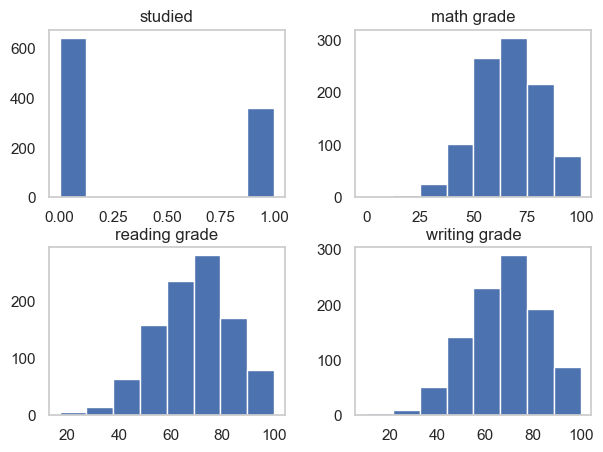

In [89]:
h = student.hist(bins=8, figsize=(7,5), grid=False)

In [90]:
student = student.replace({'studied': {1: 'yes', 0: 'no'}})
grouped_students = student.groupby(['gender', 'parents education', 'studied']).size().unstack()
display(grouped_students)

studied                         no  yes
gender parents education               
female associate's degree       74   42
       bachelor's degree        41   22
       high school              65   29
       incomplete  college      76   42
       incomplete  high school  56   35
       master's degree          22   14
male   associate's degree       66   40
       bachelor's degree        31   24
       high school              75   27
       incomplete  college      73   35
       incomplete  high school  46   42
       master's degree          17    6

### <font color='ED6CD0'>Analysis</font>

In [91]:
grouped2_students = student.groupby(['gender', 'studied', 'math grade']).size().unstack()

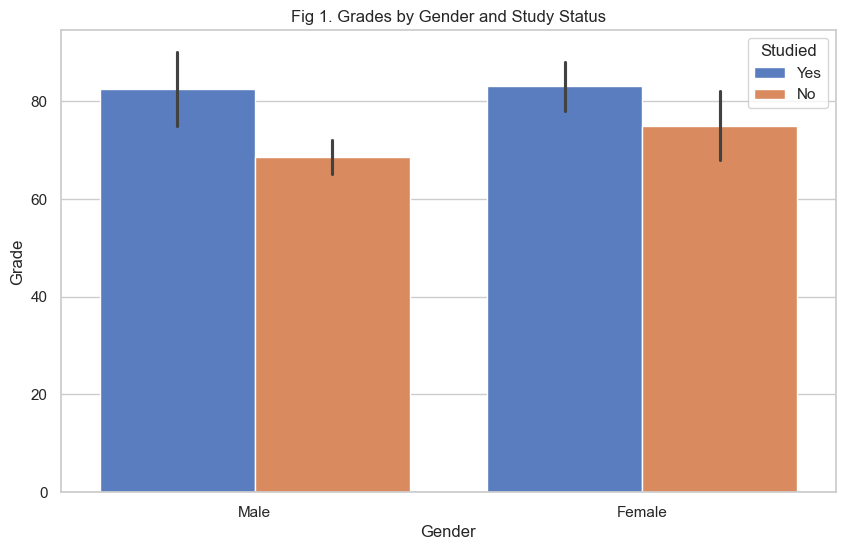

In [92]:

# Sample DataFrame
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Studied': ['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Grade': [75, 82, 65, 78, 90, 88, 72, 68]
}

df = pd.DataFrame(data)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Grade', hue='Studied', data=df, palette='muted')

# Set plot labels and title
plt.title('Fig 1. Grades by Gender and Study Status')
plt.xlabel('Gender')
plt.ylabel('Grade')

# Show the plot
plt.show()

In [93]:
student.groupby('gender')[["math grade"]].mean()

,math grade
gender,
female,63.633205
male,68.728216


Here(Fig 2), we can actually pretty clearly see that students who studied did have improved marks in every subject, so we can say that stuents who studied by doing the test preperation course had a better overall average when compared to those who did not.

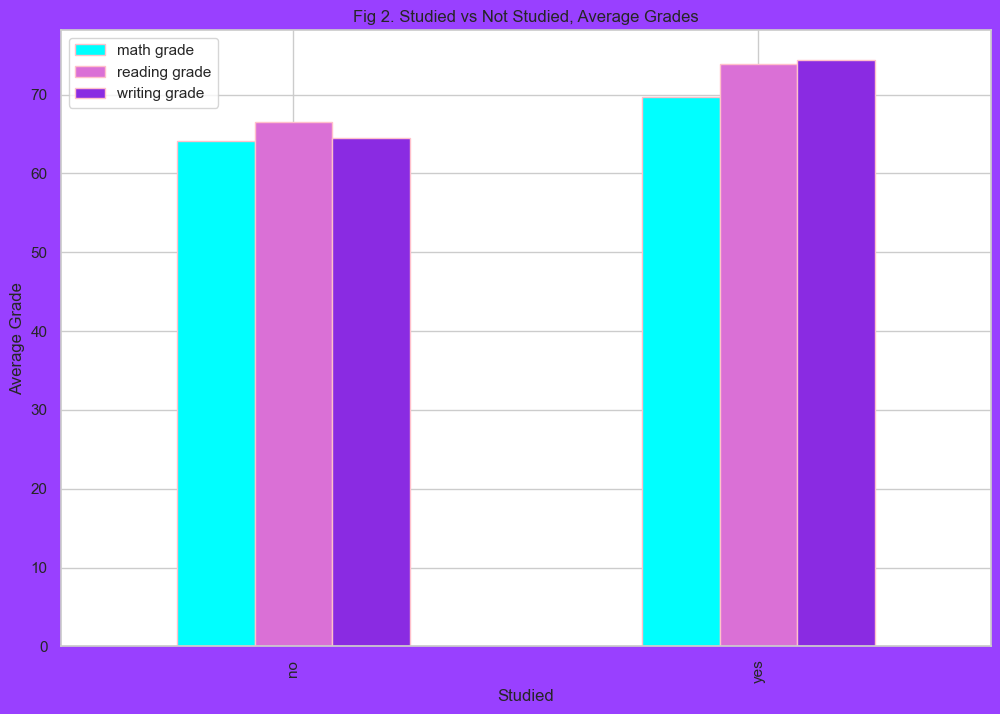

In [94]:
studied = student.groupby('studied')[["math grade", "reading grade", "writing grade"]].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting bar chart for each subject
studied.plot(kind='bar', ax=ax, color = ["aqua", "orchid", "blueviolet"], edgecolor = ["pink"])

# Set plot labels and title
ax.set_xlabel("Studied")
ax.set_ylabel("Average Grade")
ax.set_title("Fig 2. Studied vs Not Studied, Average Grades")

# Light gray gradient background
fig.patch.set_facecolor((0.60, 0.25, 1.0))
# Show the plot
plt.show()

Here in Fig 3, we can see that when it comes to mathematics overall the males do better than the females, but when it comes to reading and writing the females excel. Another thing we can notice is that the females have a lot more outliers than the males(shown by the holo cirlces), this means the girls grades sometimes were far below the average therefore making them outliars

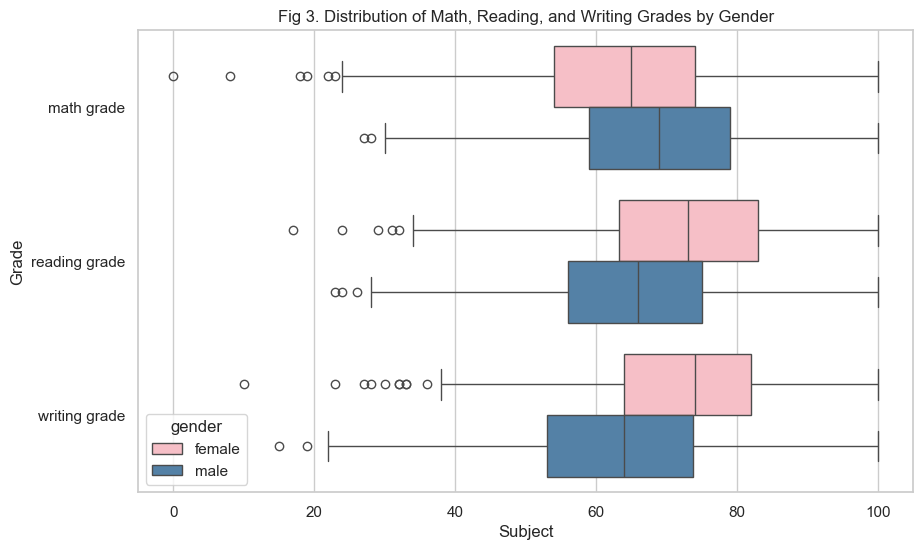

In [95]:
# Selecting relevant columns for the box plot
grades_gender = student[['math grade', 'reading grade', 'writing grade', 'gender']]

# Melt the DataFrame to long format for box plot
grades_gender_melted = pd.melt(grades_gender, id_vars='gender', var_name='subject', value_name='grade')

# Plotting the box plot
plt.figure(figsize=(10, 6))
# hue means we are colour coding them by their gender
sns.boxplot(x='grade', y='subject', hue='gender', data=grades_gender_melted, palette=["lightpink", "steelblue"])

# Set plot labels and title
plt.xlabel('Subject')
plt.ylabel('Grade')
plt.title('Fig 3. Distribution of Math, Reading, and Writing Grades by Gender')

# Show the plot
plt.show()

Here in Fig 4, we are going to a count plot for the count of students by parental education, and from what we can see there is a decent amount of parents that didn't finish college which is quite odd since I didn't think that would be the highest section, initally I thought it'd be an associates degree followed by a bachelors degree, In addition the master's degree is right where I thought it'd be, having a master's degree is not common hense it should be among the lowest

C:\Users\ejano\AppData\Local\Temp\ipykernel_20200\2992938676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parents education', data=student, palette=['midnightblue', 'slateblue', 'teal', 'darkturquoise', 'powderblue', 'lightslategray'])


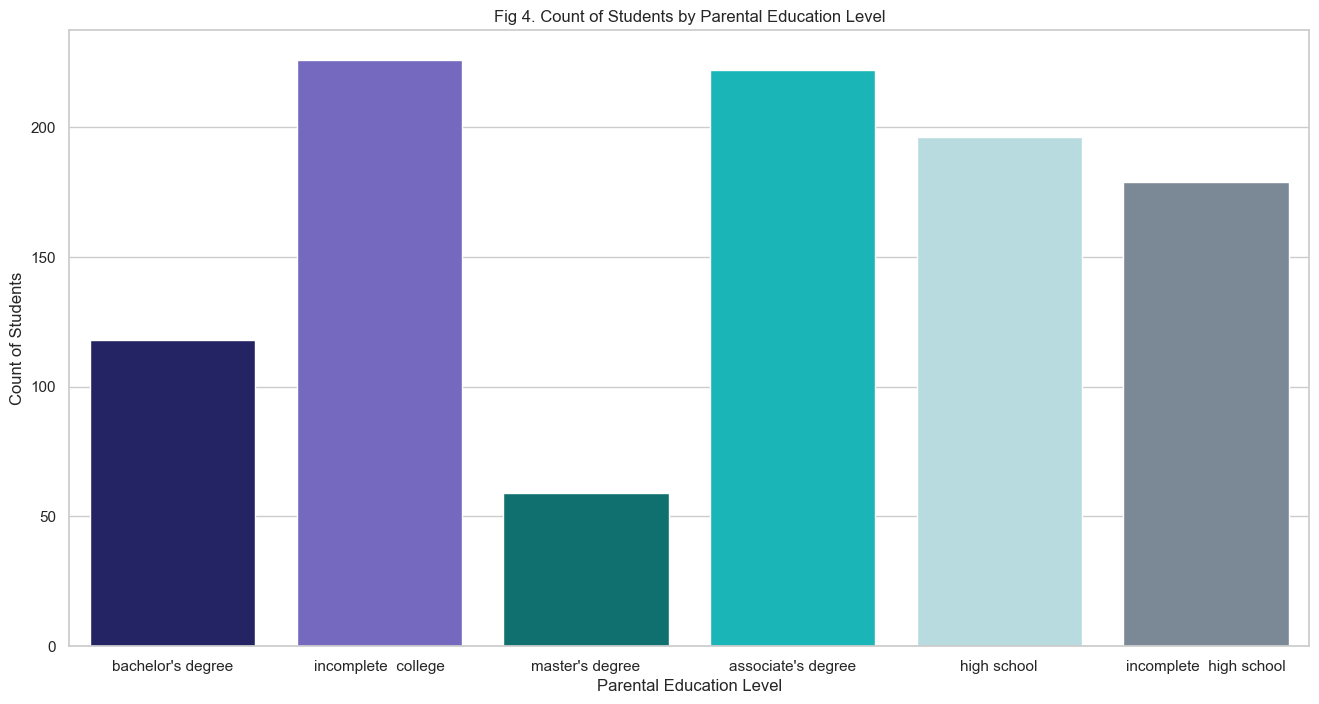

In [96]:

# Plotting the count plot
plt.figure(figsize=(16, 8))
sns.countplot(x='parents education', data=student, palette=['midnightblue', 'slateblue', 'teal', 'darkturquoise', 'powderblue', 'lightslategray'])

# Set plot labels and title
plt.xlabel('Parental Education Level')
plt.ylabel('Count of Students')
plt.title('Fig 4. Count of Students by Parental Education Level')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In Fig 5. we are looking at the relationship between the students grades and their parents education, as we can see students that have parents with a master's degree do the best in all the subjects. This may be because the students are able to get help from their parents, or have developed a good study and or learning habit from their parents. In addition students with parents who only went through high school did the worst which makes sense, the reason it isn't students with parents who didn't complete high school is because maybe their parents pushed them to be better than them and to do well in school so they can have a better education and life overall.

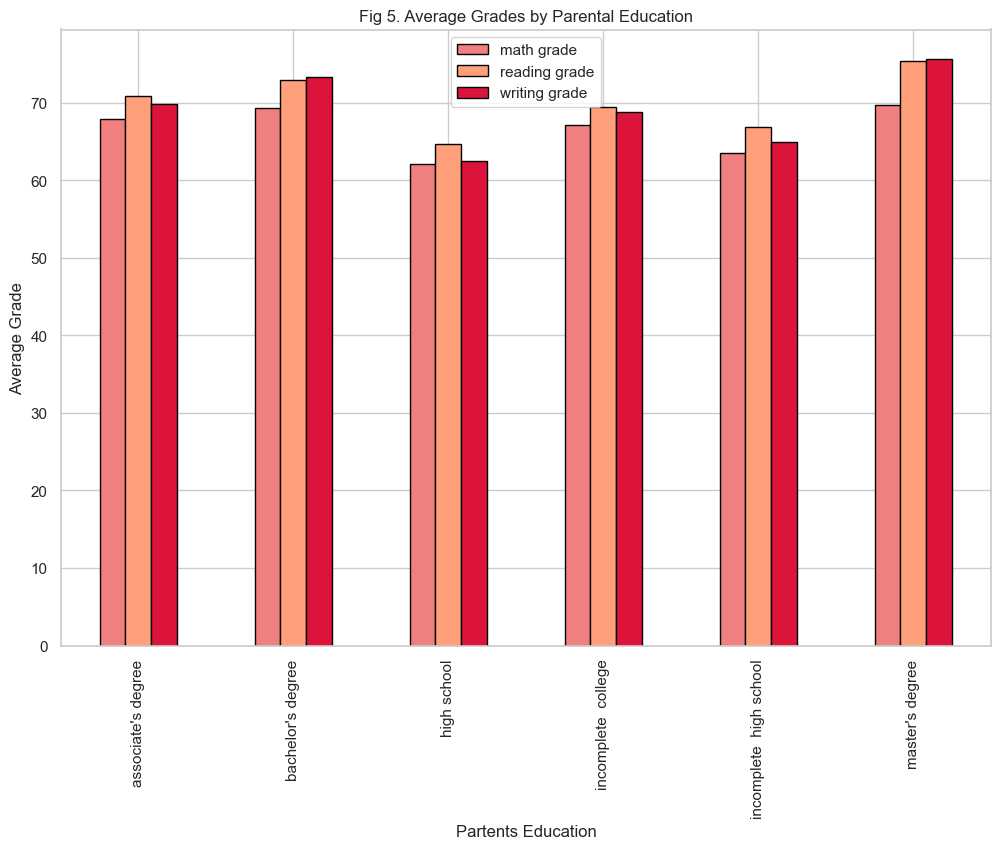

In [99]:
# Create a new categorical variable combining parental education and subject
grouped = student.groupby('parents education')[["math grade", "reading grade", "writing grade"]].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting bar chart for each subject
grouped.plot(kind='bar', ax=ax, color = ["lightcoral", "lightsalmon", "crimson"], edgecolor = ["black"])

# Set plot labels and title
ax.set_xlabel("Partents Education")
ax.set_ylabel("Average Grade")
ax.set_title("Fig 5. Average Grades by Parental Education")

# Show the plot
plt.show()

In the scatter plots below we are comparing the grades for each subject, so Math vs Reading, Math vs Writing, ect.., In the first graph we can see that students tend to do better in Reading when compared to Math, in the second graph we can see that students tend to do better in Math when compared to Writing, and in the final graph we can see that students do better in Writing when compared to Reading, in addition in all the graph we can see there are very few students who are proficient in all subjects.

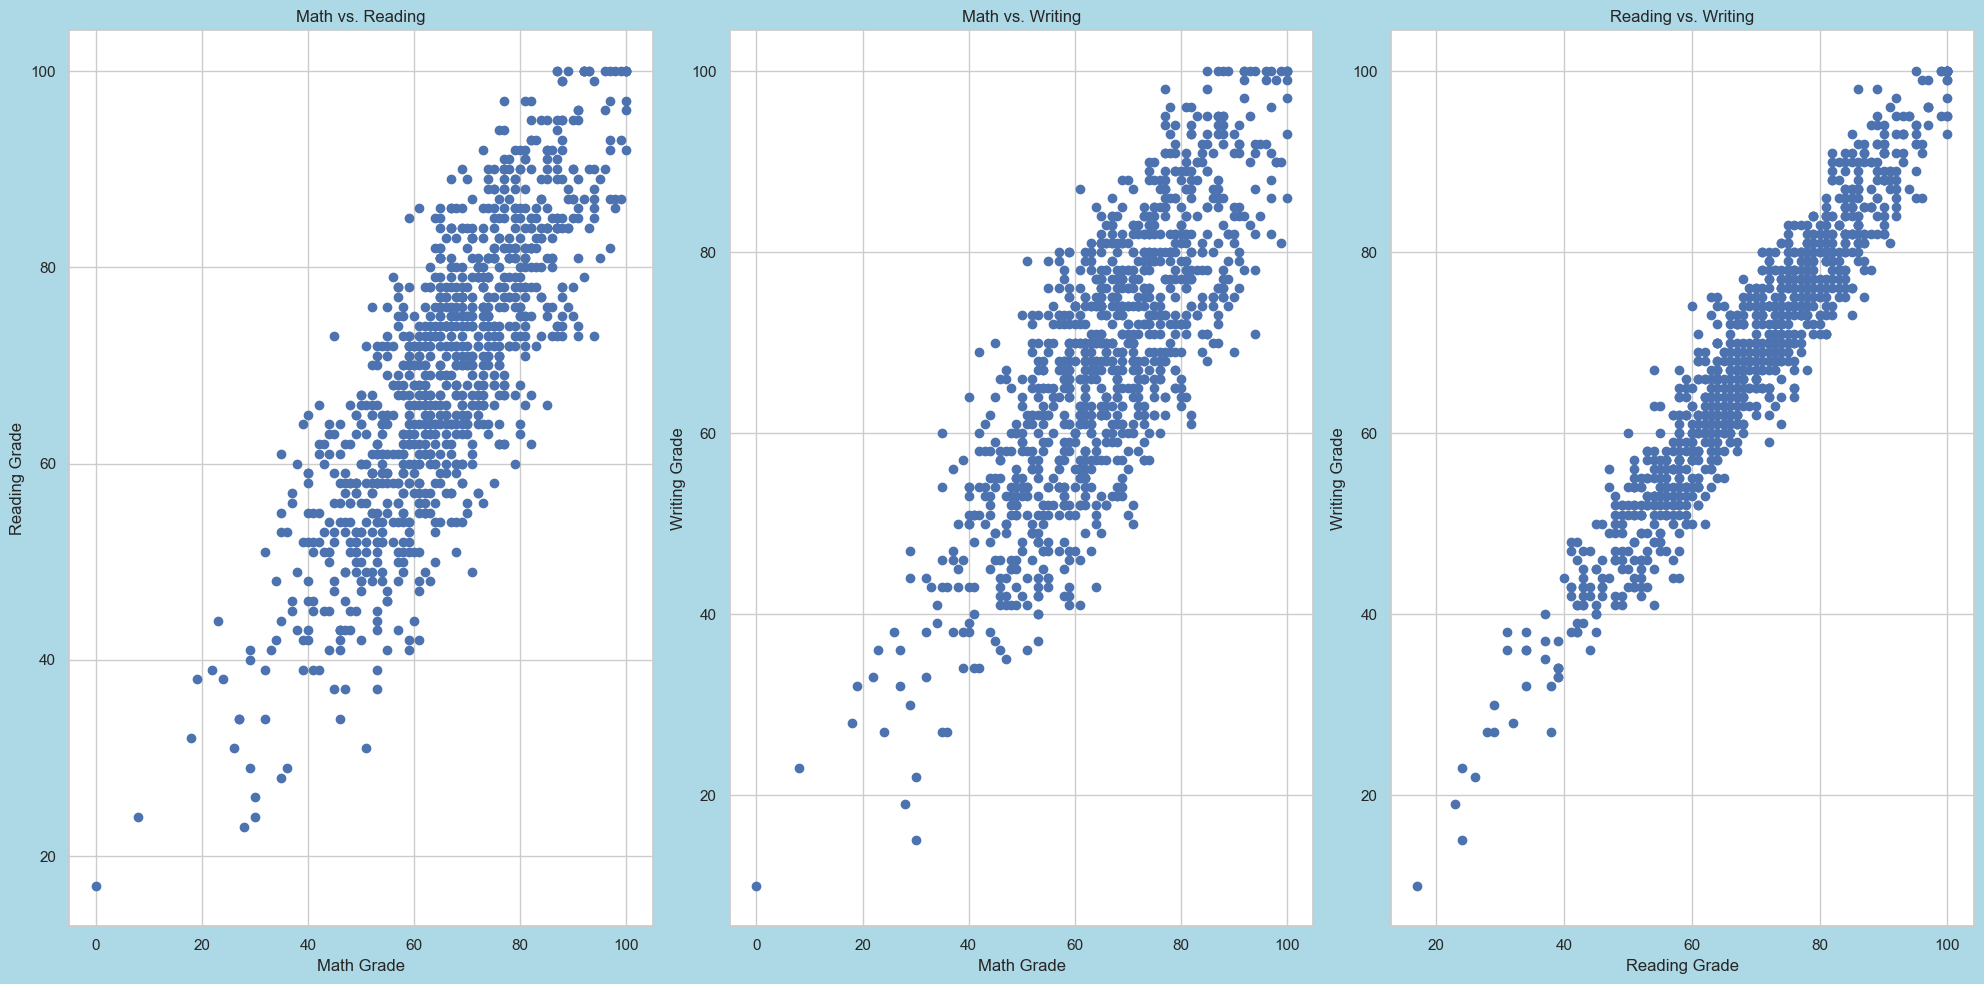

In [102]:
# Create a figure with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# Scatter plot of Math Score vs. Reading Score
ax[0].scatter(student['math grade'], student['reading grade'])
ax[0].set_title('Math vs. Reading')
ax[0].set_xlabel('Math Grade')
ax[0].set_ylabel('Reading Grade')

# Scatter plot of Math Score vs. Writing Score
ax[1].scatter(student['math grade'], student['writing grade'])
ax[1].set_title('Math vs. Writing')
ax[1].set_xlabel('Math Grade')
ax[1].set_ylabel('Writing Grade')

# Scatter plot of Reading Score vs. Writing Score
ax[2].scatter(student['reading grade'], student['writing grade'])
ax[2].set_title('Reading vs. Writing')
ax[2].set_xlabel('Reading Grade')
ax[2].set_ylabel('Writing Grade')

# Adjust layout for better spacing
plt.tight_layout()

# Set a background color for the entire figure
fig.patch.set_facecolor('lightblue')

# Show the plots
plt.show()

## <font color='ED6CD0'>Discussion</font>

In this assignment, I explored data from a student preformance report, and focused on the relationships between the students grades, and their gender, parental education, whether they studied or not, and their race/ethnicity. In my exploratory analysis, I found that students who studied tended to do better in all subjects than those who did not. In addition I looked at the relationship between the students grades and their parents education, and found that students who's parents had a masters degree were more likely to do better, The averages also show that Math is the weakest subject overall, but when looking at how each gender did in the subjucts we were able to see that the males did much better when it came to math when compared to the females, and then the females did much better in reading and writing but also surpising had more outliars meaning their were more females that get low grades compared to the males who didn't have many. All this data and analysis shows that students who study for their tests do get higher grades, and students with parents who have higher degrees of education tend to do better, this may be do to the parents being able to understand the work and teach it to their kids or that they have better study habits that rub off on their kids, dispite the parents education they should still try to support their kids and help them out in school since as we can see from the data, it does improve the students marks and helps them out in the long run.

## <font color='ED6CD0'>References</font>
1. Source data - https://www.kaggle.com/datasets/barkhaverma/student-performance-dataset
2. Pandas for data manipulation - https://pandas.pydata.org/
3. Seaborn for data viz - https://seaborn.pydata.org/
4. Matplotlib for data viz - https://matplotlib.org/
5. Chat Gpt for Ideas on possible graph comparisons - https://chat.openai.com/